In [1]:
#Look for missing values
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#change the type if its need it


# Reading file
wdiw_data = pd.read_excel('WDIW Dataset.xlsx')
wdiw_meta =pd.read_excel('WDI_Metadata.xlsx') # We have two of this. See line 68.

#Filtering out everything except the 'Hot Rod' values.
wdiw_hr = wdiw_data.loc[wdiw_data['Cool Name'] == 'Hot Rod']


#types:
#wdiw_hr.info()
#The numeric variables are floats! We wont change the type

#Looking for missing value
missing_values = wdiw_hr.isnull().sum()


#Missing values
#pd.set_option('display.max_rows', 410)


#Percentage of missing values
#percentage_missing=wdiw_hr.isnull().mean().round(2)*100


  
# Calculate GPD per Capita
wdiw_hr['GDP_per_cap'] = wdiw_hr['GDP (current US$)'] / wdiw_hr['Population, total']
wdiw_data['GDP_per_cap_all'] = wdiw_data['GDP (current US$)'] / wdiw_data['Population, total']
    
    # Merge Data with Income group - Also doing it in world.
meta_data_sheet_2 = pd.read_excel('WDI_Metadata.xlsx', sheet_name = 'Country - Metadata')
wdiw_hr.insert(2, 'Income Group', wdiw_hr['Country Code'].map(meta_data_sheet_2.set_index('Code')['Income Group']))

wdiw_data.insert(2, 'Income Group', wdiw_data['Country Code'].map(meta_data_sheet_2.set_index('Code')['Income Group']))



C:\Users\William W. Johnsen\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [2]:
#################################
#COLUMNS THAT WE'RE GOING TO USE#
#################################

wdiw_slice = wdiw_hr[['GDP (current US$)',
'GDP growth (annual %)',
'Agriculture, forestry, and fishing, value added (% of GDP)',
'Employment in agriculture (% of total employment) (modeled ILO estimate)',
'Industry (including construction), value added (% of GDP)',
'Employment in industry (% of total employment) (modeled ILO estimate)',
'Services, value added (% of GDP)',
'Employment in services (% of total employment) (modeled ILO estimate)',
'Tax revenue (% of GDP)',
'Merchandise trade (% of GDP)',
'Population density (people per sq. km of land area)',
'Population growth (annual %)',
'Population in the largest city (% of urban population)',
'Population, total',
'Rural population (% of total population)',
'Urban population (% of total population)',
'Urban population growth (annual %)',
'GINI index (World Bank estimate)',
'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
'Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)',
'Poverty headcount ratio at national poverty lines (% of population)',
'Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure',
'Prevalence of undernourishment (% of population)',
'Surface area (sq. km)',
'Mobile cellular subscriptions (per 100 people)',
'Fertility rate, total (births per woman)',
'Armed forces personnel (% of total labor force)',
'Age dependency ratio (% of working-age population)']]



In [3]:
#print(wdiw_hr)
filling_values = {
    'Adolescent fertility rate (births per 1,000 women ages 15-19)':
                    [68.487,
                    0.0579,
                    8.387,
                    53.46,
                    69.459,
                    70.93,
                    72.912,
                    60.365,
                    84.99,
                    81.828,
                    19.86],
                  #https://www.indexmundi.com/bermuda/total_fertility_rate.html
                  #Total fertility rate by the percentage of people between this ages 1.93 
                  #https://www.paho.org/adolescent-health-report-2018/images/profiles/Bermuda-PAHO%20Adolescents%20and%20Youth%20Health%20Country%20Profile%20V5.0.pdf
                  #2,126 (3% Female)... 12,758 Total youth that is 18% 0.0
                  
    'Age dependency ratio (% of working-age population)': 
                    [55.08547326,
                    43,
                    8.61607884,
                    44.56692021,
                    55.15985313,
                    65.9674161,
                    58.49347529,
                    51.46924127,
                    5.28115039,
                    54.4387154,
                    52.1558055],
                 #https://www.boleat.com/materials/population_trends_and_issues_2016.pdf Input bermuda dependency ratio 2016
                  
    'Agriculture, forestry, and fishing, value added (% of GDP)':
                    [10.82934861,
                    0.8,
                    1.76095581,
                    5.013778521,
                    5.042047146,
                    10.05815003,
                    12.84493271,
                    3.380989702,
                    15.07211843,
                    2.357434839,
                    0.91647932],

    #Data from proportion of GDP https://www.gov.bm/sites/default/files/GDP%202017%20annual%20publication.pdf
                #Data for Canada 1.711327321 by the %growth GDP 1.107 (2016) and then 1.879 (2017)= 2.9%
                  
                  #The defence of Bermuda remains the responsibility of the United Kingdom Government, rather than of the local Bermudian Government. Despite this, the Bermuda Government was historically responsible for maintaining Militia for the defence of the Colony.
                  
    'Employment in agriculture (% of total employment) (modeled ILO estimate)':
                    [17.7329998,
                    2,
                    1.518000007,
                    12.57999992,
                    18.57500076,
                    29.31599998,
                    31.98500061,
                    13.11800003,
                    31.0909996,
                    14.49400043,
                    1.434999943],
#https://www.gov.bm/sites/default/files/7530_EB_May_2017_REVISED_JULY_0.PDF
    'Employment in industry (% of total employment) (modeled ILO estimate)':
                    [14.65699959,
                    12,
                    9.52799988,
                    18.45000076,
                    21.88599968,
                    20.89800072,
                    20.68300056,
                    26.01300049,
                    16.93899918,
                    18.54899979,
                    19.72900009],
#Sum 3 industries for bermuda.https://www.gov.bm/sites/default/files/7530_EB_May_2017_REVISED_JULY_0.PDF
    'Employment in services (% of total employment) (modeled ILO estimate)':
                    [67.60900116,
                    86,
                    78.95500183,
                    68.97000122,
                    59.54000092,
                    49.7859993,
                    47.33200073,
                    60.86999893,
                    51.97000122,
                    66.95600128,
                    78.83599854],
 #Sum the rest industries for bermuda.https://www.gov.bm/sites/default/files/7530_EB_May_2017_REVISED_JULY_0.PDF
    'GDP (current US$)':
                    [1862614800,
                    6269384,
                    1.64687E+12,
                    58174550212,
                    24927970000,
                    75620095538,
                    22940179174,
                    1.15807E+12,
                    13843586680,
                    62283800000,
                    1.94854E+13],
    'GDP growth (annual %)':
                    [1.437288946,
                    4.9,
                    25.812,
                    18.99327478,
                    24.44198224,
                    5.26910429,
                    6.47477854,
                    30.70067888,
                    24.99016119,
                    29.34470922,
                    18.20794002],
                #https://data.worldbank.org/indicator/NV.IND.TOTL.ZS  24.8(2015)by the growth of gdp 1.107(2016)25.065 and 2.979(2017)25.812.
    'Merchandise trade (% of GDP)':
                    [73.71357728,
                    26.1,
                    52.40331395,
                    42.76440455,
                    65.51676691,
                    38.86533043,
                    87.17891804,
                    72.66860107,
                    90.11392993,
                    53.03465749,
                    0.29596645],
              #International business activity https://www.gov.bm/sites/default/files/GDP%202017%20annual%20publication.pdf
    'Services, value added (% of GDP)':
                    [62.90620852,
                    66.2,
                    69.43,
                    68.06539651,
                    60.665349,
                    62.13797562,
                    56.82448851,
                    60.36615614,
                    50.13167656,
                    64.6497163,
                    77.37453175],

              #Canada:66.7 value (2015) by the proportional % growth GDP fRom 2016 (67.43) and 2017(69.43)
              #Bermuda percentage Table 3 https://www.gov.bm/sites/default/files/GDP%202017%20annual%20publication.pdf

    'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)': 
                    [13.3,
                    6.7,
                    .5, 
                    1, 
                    1.9, 
                    8.7, 
                    17.2, 
                    3.2, 
                    2.5, 
                    2.5, 
                    1.2],

    'Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)':
                    [28.1,
                    14.8,
                    0.2, 
                    2.7, 
                    8.5, 
                    24.2, 
                    31.6, 
                    7.9, 
                    12.8, 
                    6.3, 
                    1.5],
'Poverty headcount ratio at national poverty lines (% of population)':
    [41.3,
    11,
    0,
    20,
    29.2,
    59.3,
    64.3,
    50.6,
    24.9,
    22.1,
    0]}

###############################################
#INCLUDING MISSING VALUES FROM OTHER RESOURCES#
###############################################

for col in filling_values:
    wdiw_slice[col] = filling_values[col]

#Cheking if the missing values are less
print(wdiw_slice.isnull().mean().round(2)*100)


wdiw_slice.to_excel('wdiw_hr_after_fill.xlsx', index = False)

GDP (current US$)                                                                                              0.0
GDP growth (annual %)                                                                                          0.0
Agriculture, forestry, and fishing, value added (% of GDP)                                                     0.0
Employment in agriculture (% of total employment) (modeled ILO estimate)                                       0.0
Industry (including construction), value added (% of GDP)                                                     18.0
Employment in industry (% of total employment) (modeled ILO estimate)                                          0.0
Services, value added (% of GDP)                                                                               0.0
Employment in services (% of total employment) (modeled ILO estimate)                                          0.0
Tax revenue (% of GDP)                                                          

C:\Users\William W. Johnsen\Anaconda3\lib\site-packages\ipykernel_launcher.py:188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\William W. Johnsen\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\William W. Johnsen\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


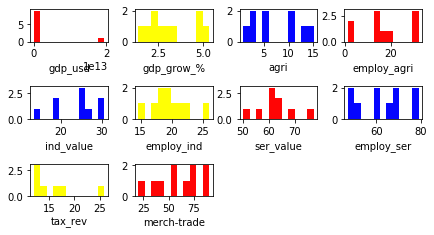

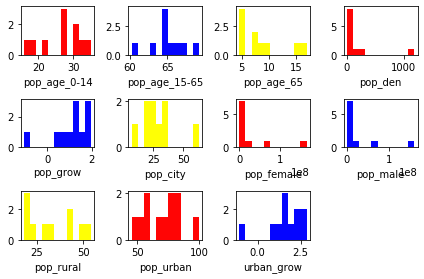

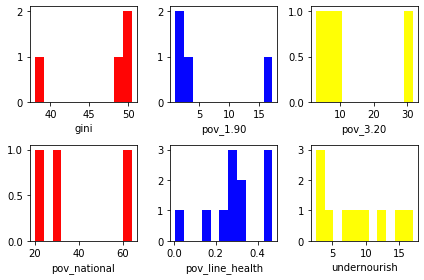

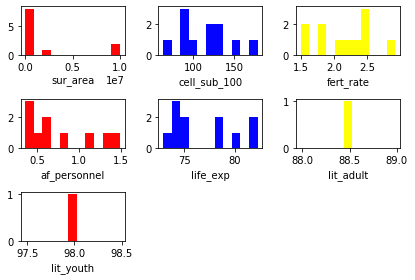

In [4]:
#Histogram
#ECONOMIC
plt.subplot(4,4,1) 
plt.hist(wdiw_hr['GDP (current US$)'],
         bins = 11,
         color='red',
         alpha = 0.98)

plt.xlabel('gdp_usd')


plt.subplot(4,4,2) 
plt.hist(wdiw_hr['GDP growth (annual %)'],
         bins = 11,
         color='yellow',
         alpha = 0.98)

plt.xlabel('gdp_grow_%')

plt.subplot(4,4,3) 
plt.hist(wdiw_hr['Agriculture, forestry, and fishing, value added (% of GDP)'],
         bins = 11,
         color='blue',
         alpha = 0.98)

plt.xlabel('agri')


plt.subplot(4,4,4) 
plt.hist(wdiw_hr['Employment in agriculture (% of total employment) (modeled ILO estimate)'],
         bins = 11,
         color='red',
         alpha = 0.98)

plt.xlabel('employ_agri')

plt.subplot(4,4,5) 
plt.hist(wdiw_hr['Industry (including construction), value added (% of GDP)'],
         bins = 11,
         color='blue',
         alpha = 0.98)
plt.xlabel('ind_value')


plt.subplot(4,4,6) 
plt.hist(wdiw_hr['Employment in industry (% of total employment) (modeled ILO estimate)'],
         bins = 11,
         color='yellow',
         alpha = 0.98)
plt.xlabel('employ_ind')

plt.subplot(4,4,7) 
plt.hist(wdiw_hr['Services, value added (% of GDP)'],
         bins = 11,
         color='red',
         alpha = 0.98)
plt.xlabel('ser_value')

plt.subplot(4,4,8) 
plt.hist(wdiw_hr['Employment in services (% of total employment) (modeled ILO estimate)'],
         bins = 11,
         color='blue',
         alpha = 0.98)
plt.xlabel('employ_ser')

plt.subplot(4,4,9) 
plt.hist(wdiw_hr['Tax revenue (% of GDP)'],
         bins = 11,
         color='yellow',
         alpha = 0.98)
plt.xlabel('tax_rev')

plt.subplot(4,4,10) 
plt.hist(wdiw_hr['Merchandise trade (% of GDP)'],
         bins = 11,
         color='red',
         alpha = 0.98)
plt.xlabel('merch-trade')


# saving the results to the working directory with savefig()
#plt.savefig('Economic histogrm.png')

# displaying the results
plt.tight_layout()
plt.show()

#Population
plt.subplot(3,4,1) 
plt.hist(wdiw_hr['Population ages 0-14 (% of total population)'],
         bins = 11,
         color='red',
         alpha = 0.98)
plt.xlabel('pop_age_0-14')


plt.subplot(3,4,2) 
plt.hist(wdiw_hr['Population ages 15-64 (% of total population)'],
         bins = 11,
         color='blue',
         alpha = 0.98)
plt.xlabel('pop_age_15-65')


plt.subplot(3,4,3) 
plt.hist(wdiw_hr['Population ages 65 and above (% of total population)'],
         bins = 11,
         color='yellow',
         alpha = 0.98)
plt.xlabel('pop_age_65')


plt.subplot(3,4,4) 
plt.hist(wdiw_hr['Population density (people per sq. km of land area)'],
         bins = 11,
         color='red',
         alpha = 0.98)
plt.xlabel('pop_den')

plt.subplot(3,4,5) 
plt.hist(wdiw_hr['Population growth (annual %)'],
         bins = 11,
         color='blue',
         alpha = 0.98)
plt.xlabel('pop_grow')

plt.subplot(3,4,6) 
plt.hist(wdiw_hr['Population in the largest city (% of urban population)'],
         bins = 11,
         color='yellow',
         alpha = 0.98)
plt.xlabel('pop_city')


plt.subplot(3,4,7) 
plt.hist(wdiw_hr['Population, female'],
         bins = 11,
         color='red',
         alpha = 0.98)
plt.xlabel('pop_female')

plt.subplot(3,4,8) 
plt.hist(wdiw_hr['Population, male'],
         bins = 11,
         color='blue',
         alpha = 0.98)
plt.xlabel('pop_male')

plt.subplot(3,4,9) 
plt.hist(wdiw_hr['Rural population (% of total population)'],
         bins = 11,
         color='yellow',
         alpha = 0.98)
plt.xlabel('pop_rural')

plt.subplot(3,4,10) 
plt.hist(wdiw_hr['Urban population (% of total population)'],
         bins = 11,
         color='red',
         alpha = 0.98)
plt.xlabel('pop_urban')

plt.subplot(3,4,11) 
plt.hist(wdiw_hr['Urban population growth (annual %)'],
         bins = 11,
         color='blue',
         alpha = 0.98)
plt.xlabel('urban_grow')

# saving the results to the working directory with savefig()
#plt.savefig('Population histogrm.png')

# displaying the results
plt.tight_layout()
plt.show()



#Poverty

plt.subplot(2,3,1) 
plt.hist(wdiw_hr['GINI index (World Bank estimate)'],
         bins = 11,
         color='red',
         alpha = 0.98)
plt.xlabel('gini')

plt.subplot(2,3,2) 
plt.hist(wdiw_hr['Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)'],
         bins = 11,
         color='blue',
         alpha = 0.98)
plt.xlabel('pov_1.90')

plt.subplot(2,3,3) 
plt.hist(wdiw_hr['Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)'],
         bins = 11,
         color='yellow',
         alpha = 0.98)
plt.xlabel('pov_3.20')

plt.subplot(2,3,4) 
plt.hist(wdiw_hr['Poverty headcount ratio at national poverty lines (% of population)'],
         bins = 11,
         color='red',
         alpha = 0.98)
plt.xlabel('pov_national')

plt.subplot(2,3,5) 
plt.hist(wdiw_hr['Number of people pushed below the $3.10 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure'],
         bins = 11,
         color='blue',
         alpha = 0.98)
plt.xlabel('pov_line_health')

plt.subplot(2,3,6) 
plt.hist(wdiw_hr['Prevalence of undernourishment (% of population)'],
         bins = 11,
         color='yellow',
         alpha = 0.98)
plt.xlabel('undernourish')

# saving the results to the working directory with savefig()
#plt.savefig('Poverty  histogrm.png')

# displaying the results
plt.tight_layout()
plt.show()

#Other

plt.subplot(3,3,1) 
plt.hist(wdiw_hr['Surface area (sq. km)'],
         bins = 11,
         color='red',
         alpha = 0.98)
plt.xlabel('sur_area')

plt.subplot(3,3,2) 
plt.hist(wdiw_hr['Mobile cellular subscriptions (per 100 people)'],
         bins = 11,
         color='blue',
         alpha = 0.98)
plt.xlabel('cell_sub_100')

plt.subplot(3,3,3) 
plt.hist(wdiw_hr['Fertility rate, total (births per woman)'],
         bins = 11,
         color='yellow',
         alpha = 0.98)
plt.xlabel('fert_rate')

plt.subplot(3,3,4) 
plt.hist(wdiw_hr['Armed forces personnel (% of total labor force)'],
         bins = 11,
         color='red',
         alpha = 0.98)
plt.xlabel('af_personnel')

plt.subplot(3,3,5) 
plt.hist(wdiw_hr['Life expectancy at birth, total (years)'],
         bins = 11,
         color='blue',
         alpha = 0.98)
plt.xlabel('life_exp')

plt.subplot(3,3,6) 
plt.hist(wdiw_hr['Literacy rate, adult total (% of people ages 15 and above)'],
         bins = 11,
         color='yellow',
         alpha = 0.98)
plt.xlabel('lit_adult')

plt.subplot(3,3,7) 
plt.hist(wdiw_hr['Literacy rate, youth total (% of people ages 15-24)'],
         bins = 11,
         color='red',
         alpha = 0.98)
plt.xlabel('lit_youth')


# saving the results to the working directory with savefig()
#plt.savefig('Other  histogrm.png')

# displaying the results
plt.tight_layout()
plt.show()

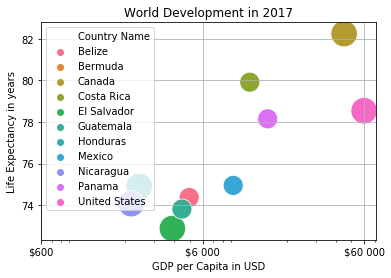

In [5]:
pop = wdiw_hr['Population, total']

np_pop = np.array(pop)

sns.scatterplot(x       = 'GDP_per_cap', 
                y       = 'Life expectancy at birth, total (years)', 
                data    = wdiw_hr, 
                hue     = 'Country Name' ,
                s = (400, 700),
                sizes   = np_pop ,
                alpha   = 'auto')

plt.xscale('log')
plt.xlabel('GDP per Capita in USD')
plt.ylabel('Life Expectancy in years')
plt.title('World Development in 2017')
plt.xticks([600, 6000, 60000], ['$600', '$6 000', '$60 000'])

plt.grid(True)
plt.show()

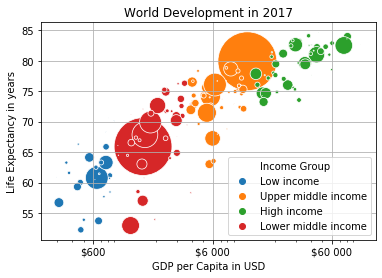

In [6]:
pop_1 = wdiw_data['Population, total']

np_pop_1 = np.array(pop_1)

sns.scatterplot(x       = 'GDP_per_cap_all', 
                y       = 'Life expectancy at birth, total (years)', 
                data    =  wdiw_data,
                hue     = 'Income Group' ,
                s       = np_pop_1 / 400000,
                alpha   = 'auto')

plt.xscale('log')
plt.xlabel('GDP per Capita in USD')
plt.ylabel('Life Expectancy in years')
plt.title('World Development in 2017')
plt.xticks([600, 6000, 60000], ['$600', '$6 000', '$60 000'])

plt.grid(True)
plt.show()

# Most people live in middle-income countries, but there are big gaps
# https://www.gapminder.org/answers/how-does-income-relate-to-life-expectancy/